In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.metrics import mutual_info_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
[t1, t2, t3, t4] = [pd.read_csv(f'../data/train_{i}.csv', parse_dates=["时间"]) for i in range(1, 5)]

In [3]:
[p1, p2, p3, p4] = [pd.read_csv(f'../data/test_{i}.csv', parse_dates=["时间"]) for i in range(1, 5)]

In [4]:
for i, data in enumerate([t1, t2, t3, t4]):
    print(f'train data {i+1}, shape {data.shape} from {data["时间"].min().date()} to {data["时间"].max().date()}. \
          NaN data: {data.isnull().sum().sum()}')

train data 1, shape (66859, 9) from 2016-04-01 to 2018-04-30.           NaN data: 0
train data 2, shape (43755, 9) from 2017-01-01 to 2018-04-30.           NaN data: 0
train data 3, shape (29792, 9) from 2017-08-01 to 2018-07-31.           NaN data: 0
train data 4, shape (42687, 9) from 2017-01-01 to 2018-04-29.           NaN data: 0


In [5]:
for i, data in enumerate([p1, p2, p3, p4]):
    print(f'test data {i+1}, shape {data.shape} from {data["时间"].min().date()} to {data["时间"].max().date()}. \
          NaN data: {data.isnull().sum().sum()}')

test data 1, shape (11808, 8) from 2018-04-30 to 2018-08-31.           NaN data: 0
test data 2, shape (14688, 8) from 2018-04-30 to 2018-09-30.           NaN data: 0
test data 3, shape (6181, 8) from 2018-07-31 to 2018-10-08.           NaN data: 0
test data 4, shape (13894, 8) from 2018-05-01 to 2018-09-28.           NaN data: 0


In [6]:
t1 = t1.drop_duplicates().reset_index(drop=True)

In [8]:
t1.describe()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
count,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000
mean,-0.576609,-0.664325,163.364893,-0.006276,0.110206,-0.088533,236.341804,2.105609
std,0.559381,0.267507,95.693066,0.380029,0.284216,0.442732,342.082201,2.989093
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.020000,-0.073667
25%,-1.000000,-0.858491,92.000000,-0.317172,-0.090909,-0.452632,0.000000,-0.022000
50%,-0.954760,-0.735849,117.000000,-0.014141,0.090909,-0.157895,2.844670,0.000000
75%,-0.176249,-0.547170,270.000000,0.292929,0.272727,0.263158,424.249000,4.149502
max,1.000000,1.000000,359.000000,1.000000,1.000000,0.978947,1303.110000,10.485300


In [9]:
for col in t1.columns[:-1]:
    print(f'互信息（{col}, 实际功率）：{mutual_info_score(t1[col], t1["实际功率"]): .2f}')

互信息（时间, 实际功率）： 6.92
互信息（辐照度, 实际功率）： 3.69
互信息（风速, 实际功率）： 1.91
互信息（风向, 实际功率）： 2.47
互信息（温度, 实际功率）： 2.84
互信息（压强, 实际功率）： 1.16
互信息（湿度, 实际功率）： 1.90
互信息（实发辐照度, 实际功率）： 4.81


In [10]:
t1.corr()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
辐照度,1.000000,-0.141627,-0.025754,0.400988,-0.105926,-0.407298,0.888917,0.898904
风速,-0.141627,1.000000,0.232877,0.050437,-0.037915,-0.124268,-0.156142,-0.173595
风向,-0.025754,0.232877,1.000000,-0.332824,0.223073,-0.215144,0.000581,0.016333
温度,0.400988,0.050437,-0.332824,1.000000,-0.325550,0.110023,0.262052,0.234637
压强,-0.105926,-0.037915,0.223073,-0.325550,1.000000,0.180172,-0.052342,-0.028451
湿度,-0.407298,-0.124268,-0.215144,0.110023,0.180172,1.000000,-0.436354,-0.419725
实发辐照度,0.888917,-0.156142,0.000581,0.262052,-0.052342,-0.436354,1.000000,0.961298
实际功率,0.898904,-0.173595,0.016333,0.234637,-0.028451,-0.419725,0.961298,1.000000


In [12]:
t1.groupby(t1["时间"].dt.month)["实际功率"].agg(['min', 'max', 'mean', 'std'])

,min,max,mean,std
时间,,,,
1,-0.035000,9.63133,2.027105,3.090347
2,-0.025333,9.98267,2.138745,3.156874
3,-0.072333,9.98533,2.364644,3.288478
4,-0.073667,10.04730,2.310633,3.145029
5,-0.028333,9.88700,2.160962,2.921320
6,-0.058000,9.83333,2.202657,2.881560
7,-0.058000,9.52533,2.116429,2.841129
8,-0.059333,9.58667,1.998528,2.756599
9,-0.045000,8.79567,1.625868,2.236459


In [15]:
t1.groupby(pd.cut(t1["风向"], bins=list(range(0, 360, 30))))["实际功率"].mean()

风向
(0, 30]       1.307218
(30, 60]      1.255221
(60, 90]      1.451164
(90, 120]     2.228904
(120, 150]    3.646205
(150, 180]    3.342589
(180, 210]    2.699296
(210, 240]    2.534362
(240, 270]    2.396824
(270, 300]    1.736440
(300, 330]    1.862912
Name: 实际功率, dtype: float64

In [31]:
mutual_info_score(t1['时间'].dt.time, t1['实际功率'])

2.2254134026536456

In [35]:
mutual_info_score(t1['时间'], t1['实际功率'])

6.9242617749970465

In [37]:
t1.groupby(t1['时间'].dt.month)['实际功率'].agg(['min','max','mean'])

,min,max,mean
时间,,,
1,-0.035000,9.63133,2.027105
2,-0.025333,9.98267,2.138745
3,-0.072333,9.98533,2.364644
4,-0.073667,10.04730,2.310633
5,-0.028333,9.88700,2.160962
6,-0.058000,9.83333,2.202657
7,-0.058000,9.52533,2.116429
8,-0.059333,9.58667,1.998528
9,-0.045000,8.79567,1.625868


In [38]:
t1['month'] = t1['时间'].dt.month
t1['hour'] = t1['时间'].dt.hour

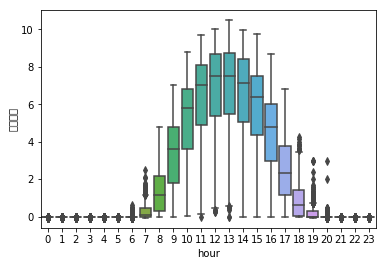

In [41]:
sns.boxplot(x='hour', y='实际功率', data=t1)

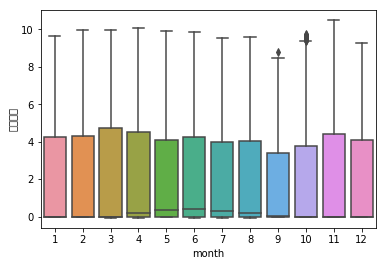

In [42]:
sns.boxplot(x='month', y='实际功率', data=t1)